In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

1.Loading and Preprocessing

In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
# Target (species) column (if you need it for validation later)
y = pd.Series(iris.target, name="species")
# Display first few rows
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


2. Clustering Algorithm Implementation

KMeans Clustering

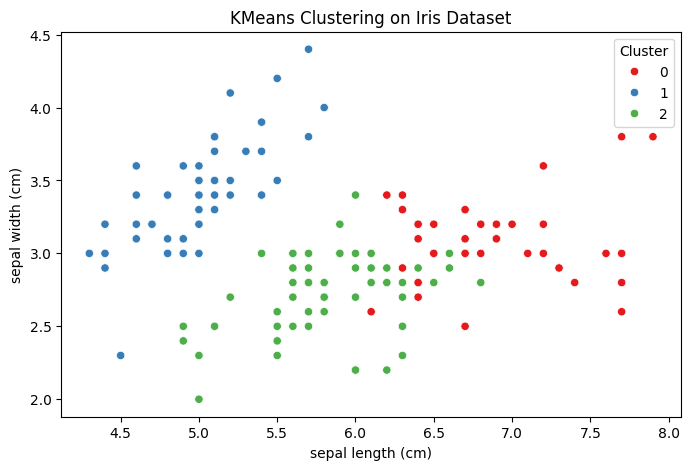

In [4]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
X_kmeans = X.copy()
X_kmeans['Cluster'] = kmeans_labels

# Visualization using first two features
plt.figure(figsize=(8, 5))
sns.scatterplot(data=X_kmeans, x=iris.feature_names[0], y=iris.feature_names[1], hue='Cluster', palette='Set1')
plt.title("KMeans Clustering on Iris Dataset")
plt.show()

How it works: KMeans is a centroid-based clustering algorithm that partitions the dataset into K clusters. It works by:

Initializing K centroids randomly.

Assigning each data point to the nearest centroid.

Updating the centroids based on the mean of the assigned points.

Repeating steps 2–3 until convergence (no change in assignments or centroids).

🔹 Why it's suitable for Iris: Iris has 3 natural species, and KMeans is effective when the number of clusters (K) is known or guessable.

It works well with spherical, equally sized clusters, which the Iris data roughly follows.

Hierarchical Clustering

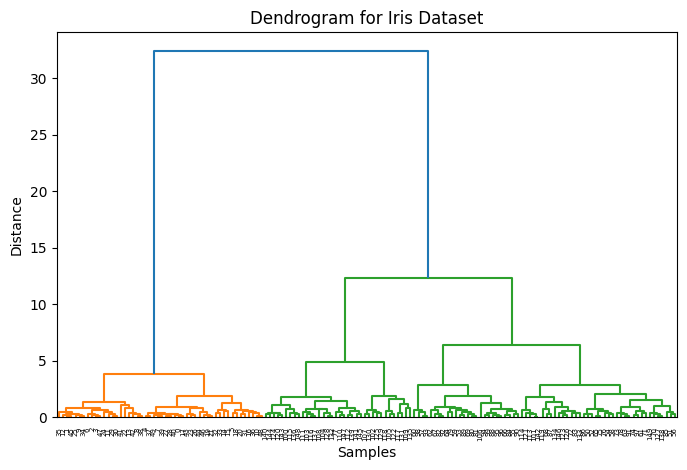

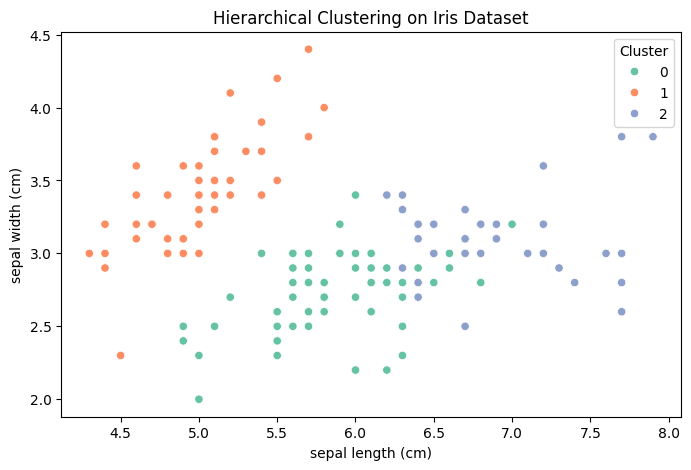

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Plot dendrogram
plt.figure(figsize=(8, 5))
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Iris Dataset")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(X)

# Add cluster labels
X_hc = X.copy()
X_hc['Cluster'] = hc_labels

# Visualization using first two features
plt.figure(figsize=(8, 5))
sns.scatterplot(data=X_hc, x=iris.feature_names[0], y=iris.feature_names[1], hue='Cluster', palette='Set2')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.show()

How it works: Hierarchical clustering creates a tree-like structure (dendrogram) by:

Treating each point as its own cluster.

Iteratively merging the closest pairs of clusters based on a distance metric (e.g., Ward's method).

The process continues until all points belong to a single cluster.

🔹 Why it's suitable for Iris: Iris has distinct subgroups, which hierarchical clustering can visualize.

It doesn't require pre-specifying the number of clusters.

The dendrogram helps in deciding the best number of clusters visually.